In [2]:
import pandas as pd
import loader as load
# aak_ge = load.loadGEWithClinical()

In [3]:
target = "stage"
files = ['aak_ge', 'tcma_gen', 'tcma_gen_aak_ge']
data = [pd.read_csv(fr"Data\Descriptor\Prediction_Tables\{target}\{x}_pred.csv", index_col=None) for x in files]
data[0].head(5)
data[2]["cancer"].nunique()

4

['COAD' 'ESCA' 'HNSC' 'STAD']


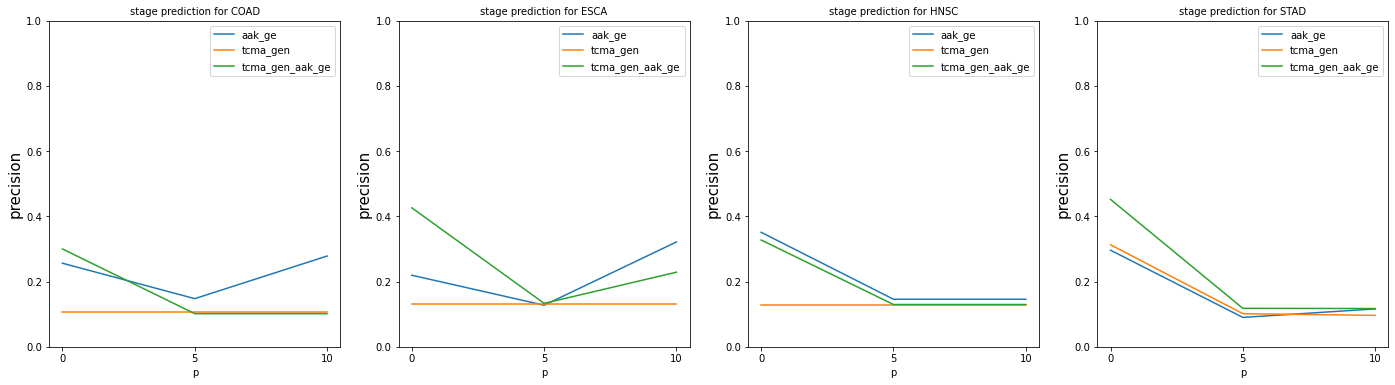

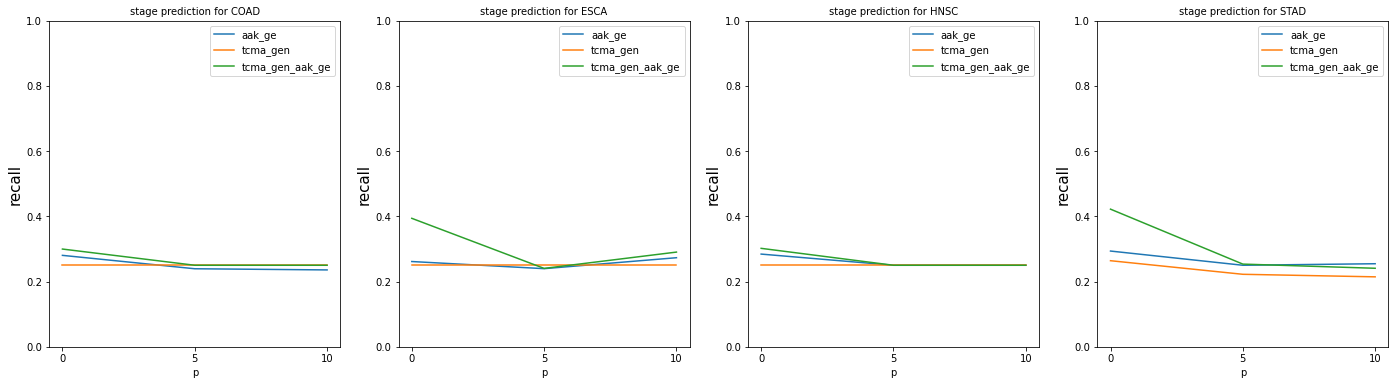

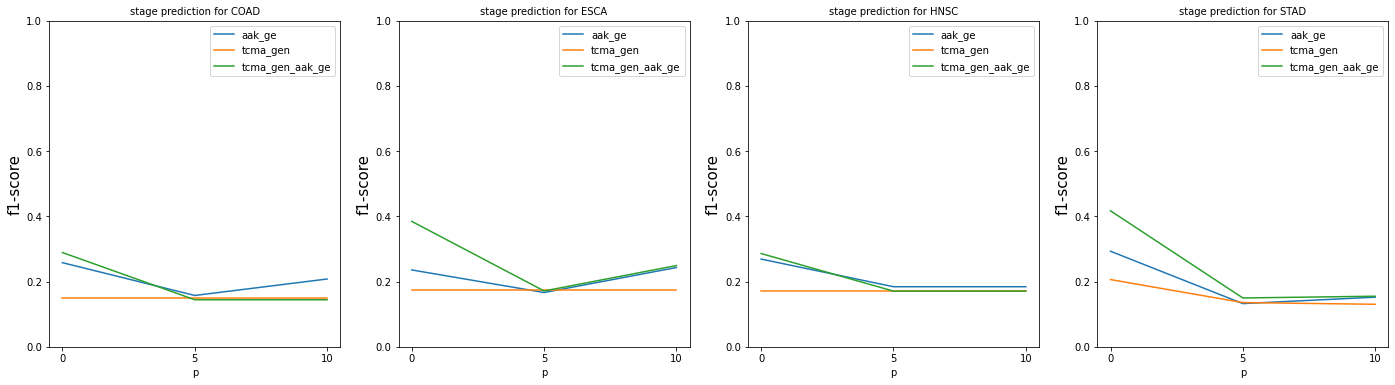

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# fig, ax = plt.subplots()

print(data[0].cancer.unique())
for metric in ["precision", "recall", "f1-score"]:
    fig = plt.figure(figsize = (24, 6))
    for i, cancer in enumerate(data[0].cancer.unique()):
        ax = fig.add_subplot(1,4,(i+1)) 
        ax.set_title(f"{target} prediction for {cancer}", fontsize = 10)
        ax.set_ylabel(metric, fontsize = 15)
            

        for j, d in enumerate(data):
            # d["balanced_accuracy"] = d[""]
            d = d[[metric, "cancer", "p"]]
            d = d[d.cancer == cancer]
            feature_amounts = d.p.unique()
            line = d.plot(kind="line", x="p", y=metric, ax=ax, label=files[j], xticks=feature_amounts, ylim=(0, 1))
    filename = f"Visual/prediction/{target}_{metric}.png"
    # plt.savefig(filename, transparent=False, facecolor="white")


In [5]:
data, files = load.loadAll(includeStage=(target=="stage"), sameSamples=True)
files

c:\Users\Ameno\Desktop\Life\Thesis\Host-Microbial-Omics-Integration\loader.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aak_ge_clinical_types["portion_id"] = aak_ge_clinical_types.apply(lambda row: str(row.portion_id)[:-4], axis=1)
c:\Users\Ameno\Desktop\Life\Thesis\Host-Microbial-Omics-Integration\loader.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aak_ge_clinical_types.drop_duplicates(["portion_id"], inplace=True)
c:\Users\Ameno\Desktop\Life\Thesis\Host-Microbial-Omics-Integration\loader.py:64: SettingWithCopyWarning: 
A value is trying to be se

['tcma_gen', 'aak_ge', 'tcma_gen_aak_ge']

Dropped 102 zero rows


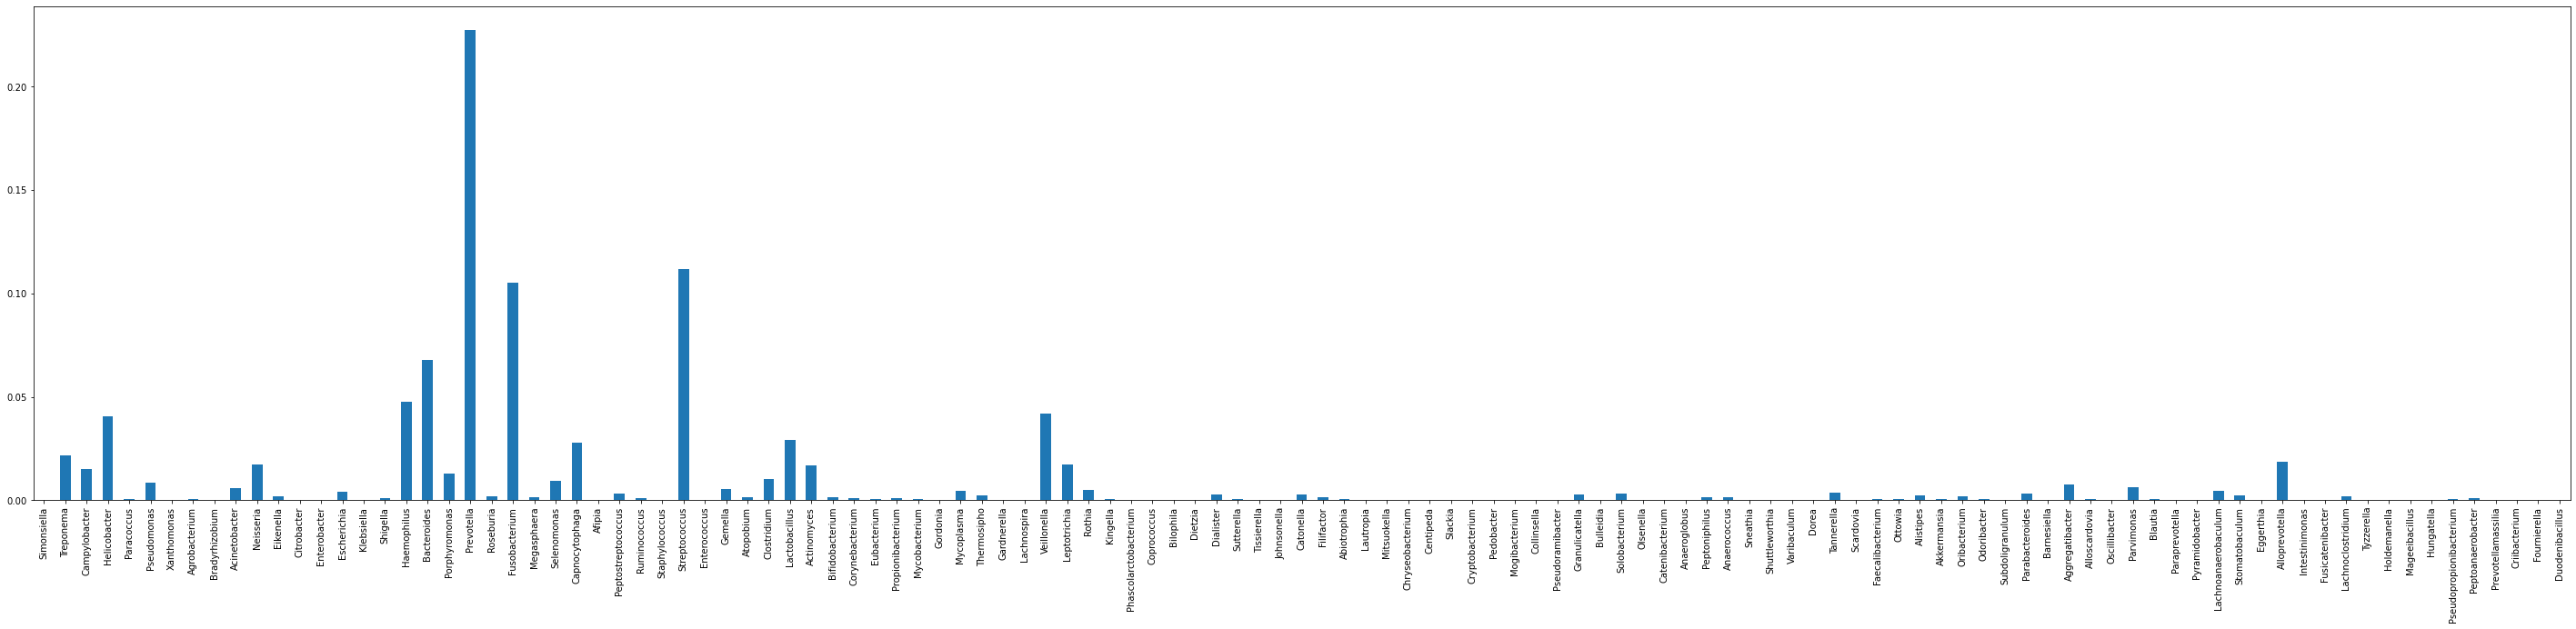

In [19]:
tcma_gen = data[0]
tcma_gen.head(1)
taxa = tcma_gen.iloc[:, :-2]
taxa_means = taxa.mean(axis=0)

# Remove zero values
taxa_means_nonzero = taxa_means.where(lambda x : x != 0).dropna()

print(f"Dropped {len(taxa_means) - len(taxa_means_nonzero)} zero rows")

ax = taxa_means_nonzero.plot(kind="bar", figsize=(50,10))

In [18]:
taxa_fig = ax.get_figure()
taxa_fig.savefig("Visual/TCMA/tcma_genus_abundance.png", transparent=False, facecolor="white")